#  Quantum classificator using library Pennylane

In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

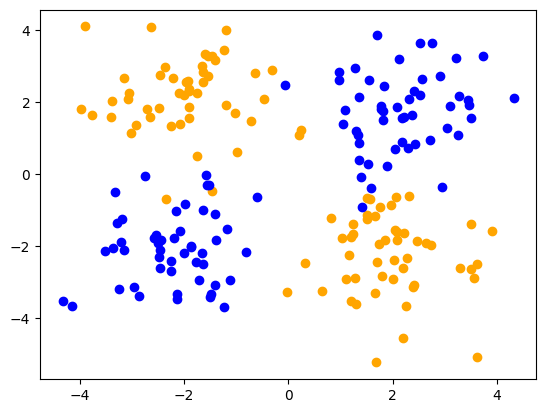

In [6]:
n_samples = 200
# Se crean arreglos con distribuciones normales centradas en loc, se crean 4 distribuciones Gaussianas.
A = np.array([[np.random.normal(loc=-2), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
B = np.array([[np.random.normal(loc=2), np.random.normal(loc=-2)] for i in range(n_samples//4)]) 
C = np.array([[np.random.normal(loc=2), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
D = np.array([[np.random.normal(loc=-2), np.random.normal(loc=-2)] for i in range(n_samples//4)]) 

plt.scatter(A[:,0], A[:,1], color = "orange")
plt.scatter(B[:,0], B[:,1], color = "orange")
plt.scatter(C[:,0], C[:,1], color = "blue")
plt.scatter(D[:,0], D[:,1], color = "blue")
plt.show()



In [7]:
feature = np.concatenate([A, B, C, D], axis=0)
label = np.concatenate([-np.ones(n_samples // 2), np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))
print(data)

In [8]:
# Definimos que tipo de función de activación a usar, en este caso es una ArcoTangente
# Clasificador  lineal clásico, es  clasica la linea, la función de activación es ArcTan
def model(x, w):
    return np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi / 2)

In [15]:

# Definimos el modelo  cuántico a utilizar
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def model(x, w):
    
    qml.RX(x[0]*w[2], wires = 0)
    qml.RX(x[1]*w[3], wires = 1)
    
    qml.RX(w[0], wires = 0)
    qml.RX(w[1], wires = 1)
    qml.CNOT(wires = [1,0])

    return qml.expval(qml.PauliZ(wires = 0))

In [19]:
#def z_func(x, w):
 #   return model(x,w)

limit = np.pi
x = np.arange(-limit, limit, 0.2)
y = np.arange(-limit, limit, 0.2)

# Calculating the output and storing it in the array Z

def plot(f):
    Z = np.zeros([len(x), len(y)])
    for ind, i in enumerate(x):
        for ind2, j in enumerate(y):
            Z[ind,ind2] = f([i, j],w)

    im = plt.imshow(Z, extent=(-limit, limit, -limit, limit), interpolation='bilinear')
    plt.scatter(A[:,0], A[:,1], color = "orange")
    plt.scatter(B[:,0], B[:,1], color = "orange")
    plt.scatter(C[:,0], C[:,1], color = "blue")
    plt.scatter(D[:,0], D[:,1], color = "blue")
    plt.axis((-limit,limit,-limit,limit))
    plt.colorbar(im)

    plt.show()

In [58]:
def average_loss(w, data):
    losses = 0
    i = 0
    for x,y in data:
        losses += (model(x,w) - y) ** 2
        print(qml.draw(model)(x,w))
    return losses/len(data)

In [59]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(1.42)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(0.85)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(1.72)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(1.67)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(1.12)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(0.25)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(1.44)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(1.58)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(1.28)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(0.80)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(1.65)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(0.97)───RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(-0.23)──RX(-0.20)─╰●─┤     
0: ──RX(-0.00)──RX(-1.00)─╭X─┤  <Z>
1: ──RX(0.74)───RX(-0.20)─╰●

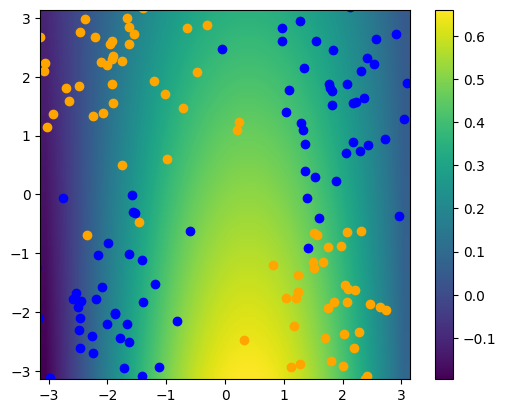

0: ──RX(-0.09)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.52)───RX(-0.19)─╰●─┤     
0: ──RX(-0.06)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(0.91)───RX(-0.19)─╰●─┤     
0: ──RX(-0.07)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.84)───RX(-0.19)─╰●─┤     
0: ──RX(-0.09)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.78)───RX(-0.19)─╰●─┤     
0: ──RX(-0.18)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.20)───RX(-0.19)─╰●─┤     
0: ──RX(-0.10)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(0.27)───RX(-0.19)─╰●─┤     
0: ──RX(-0.02)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.54)───RX(-0.19)─╰●─┤     
0: ──RX(-0.08)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.69)───RX(-0.19)─╰●─┤     
0: ──RX(-0.11)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.37)───RX(-0.19)─╰●─┤     
0: ──RX(-0.15)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(0.85)───RX(-0.19)─╰●─┤     
0: ──RX(-0.09)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.76)───RX(-0.19)─╰●─┤     
0: ──RX(-0.07)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(1.03)───RX(-0.19)─╰●─┤     
0: ──RX(-0.09)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(-0.25)──RX(-0.19)─╰●─┤     
0: ──RX(-0.04)──RX(-1.03)─╭X─┤  <Z>
1: ──RX(0.79)───RX(-0.19)─╰●

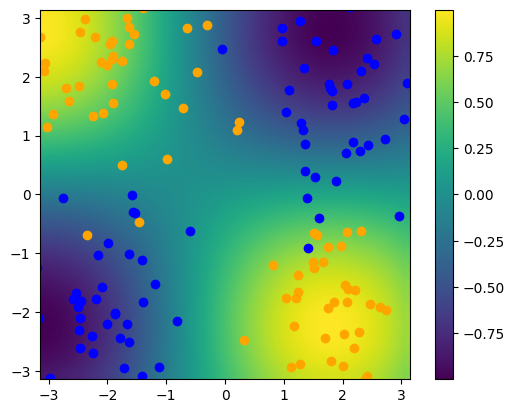

0: ──RX(-0.99)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(1.75)───RX(-1.11)─╰●─┤     
0: ──RX(-0.63)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(1.05)───RX(-1.11)─╰●─┤     
0: ──RX(-0.75)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(2.12)───RX(-1.11)─╰●─┤     
0: ──RX(-0.98)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(2.05)───RX(-1.11)─╰●─┤     
0: ──RX(-1.87)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(1.38)───RX(-1.11)─╰●─┤     
0: ──RX(-1.07)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(0.31)───RX(-1.11)─╰●─┤     
0: ──RX(-0.19)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(1.78)───RX(-1.11)─╰●─┤     
0: ──RX(-0.85)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(1.95)───RX(-1.11)─╰●─┤     
0: ──RX(-1.19)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(1.58)───RX(-1.11)─╰●─┤     
0: ──RX(-1.62)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(0.98)───RX(-1.11)─╰●─┤     
0: ──RX(-0.94)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(2.03)───RX(-1.11)─╰●─┤     
0: ──RX(-0.73)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(1.19)───RX(-1.11)─╰●─┤     
0: ──RX(-0.89)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(-0.29)──RX(-1.11)─╰●─┤     
0: ──RX(-0.43)──RX(-1.37)─╭X─┤  <Z>
1: ──RX(0.91)───RX(-1.11)─╰●

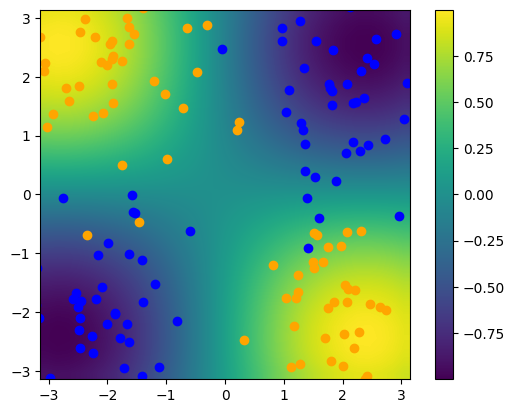

In [60]:
from IPython.display import clear_output
w = np.array([-1., -0.2, 0.,0.5], requires_grad = True)

lr = 0.1
for epoch in range(41):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 20 == 0:
        print("epoch", epoch, "loss", average_loss(w,data))
        plot(model)
        #clear_output(wait=True)